In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('handson_1_ds.txt', delimiter='\s+')
df.head()

,YEAR,HGHT,STORIES
0,1990,770,54
1,1980,677,47
2,1990,428,28
3,1989,410,38
4,1966,371,29


In [3]:
#data explorations
df.shape

(60, 3)

In [4]:
df.isnull().sum()

YEAR       0
HGHT       0
STORIES    0
dtype: int64

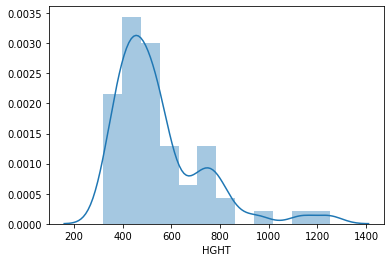

In [5]:
#check for normal distribution or not
sns.distplot(df['HGHT'])
plt.show()

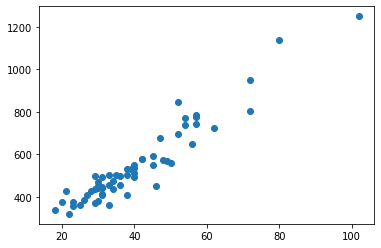

In [6]:
plt.scatter(df['STORIES'], df['HGHT'])
plt.show()

In [7]:
## data preprocessing
X = df[['HGHT']].values
y = df[['STORIES']].values


In [8]:
# split train and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(48, 1) (12, 1) (48, 1) (12, 1)


In [9]:
# Model selection

from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

#train model
linear_reg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
#print coefficient
print('Y Coefficient ', linear_reg.intercept_)
print('Coefficient b1', linear_reg.coef_)
#y = 2.5564+0.0784X

Y Coefficient  [-2.55635295]
Coefficient b1 [[0.07840212]]


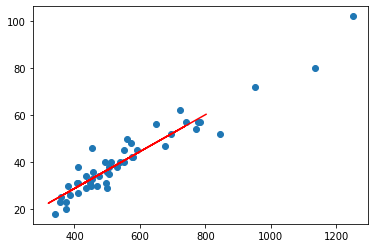

In [12]:
#Predictions
y_pred = linear_reg.predict(X_test)
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')

In [16]:
#y_test is test data from source, y_pred is prediction from data model
df1 = pd.DataFrame({'Actual': y_test.flatten(),'Predicted': y_pred.flatten()})
df1.head(15)

,Actual,Predicted
0,72,60.322148
1,31,32.018982
2,21,30.999755
3,54,55.382815
4,33,36.958316
5,28,30.999755
6,22,22.532326
7,30,31.940580
8,33,25.982019
9,39,38.996771


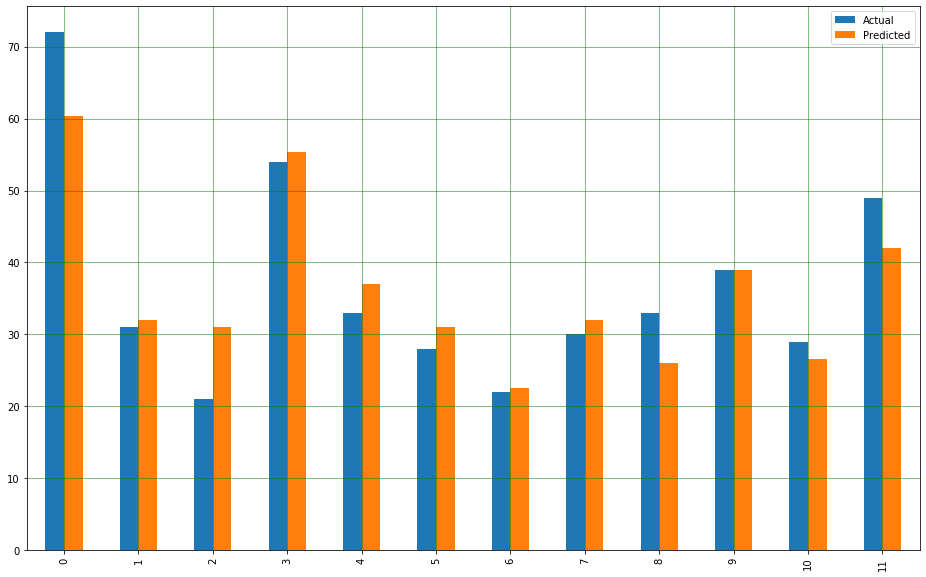

In [17]:
df2 = df1.head(15)
df2.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
plt.show()

In [22]:
## Matrics calculation for performance
from sklearn import metrics
from sklearn.metrics import r2_score

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 Score: 0.844975133654873
Mean Absolute Error 4.168725387421264
Mean Squared Error 31.05987790918931
Root Mean Squared Error 5.5731389637429025
